In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\ML\projects\Gemstone\notebooks\data\gemstone.csv")

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df.shape

(193573, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [8]:
df.drop(columns=["id"])

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [9]:
df = df.drop(columns=["id"])

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [11]:
df.duplicated().sum()
# No duplicated values

0

In [12]:
categorical_columns = df.columns[df.dtypes == "object"]
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [13]:
numerical_columns = df.columns[df.dtypes != "object"]
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')---> dtype='object' refers to the data type of the column name(which is string)

In [14]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [15]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


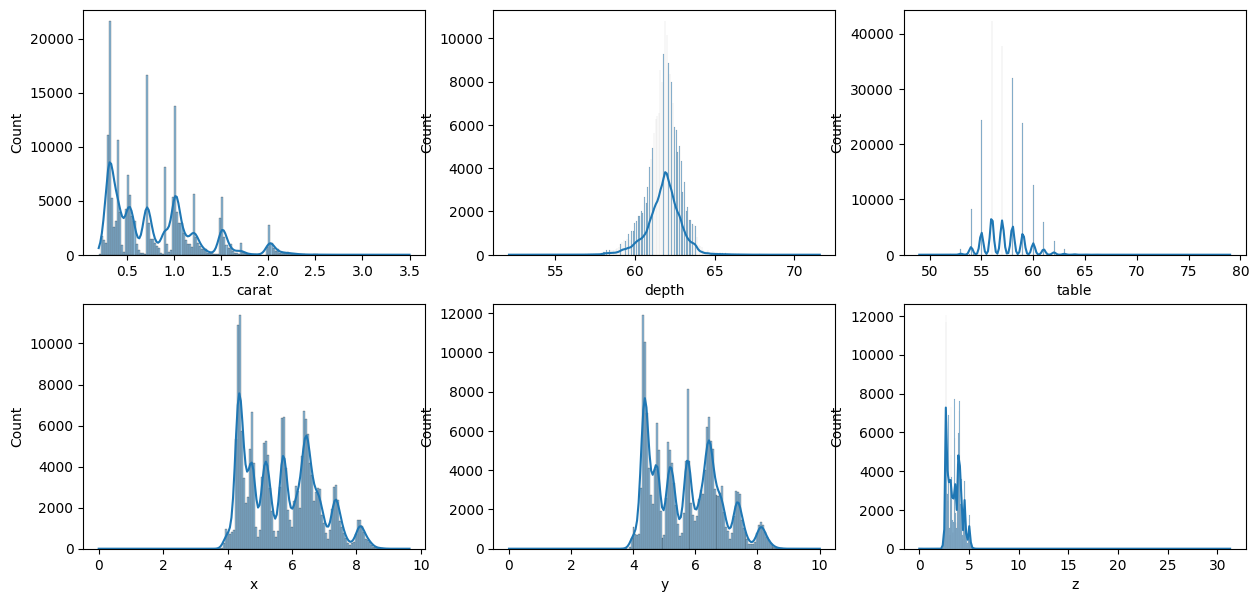

In [28]:
figure = plt.figure(figsize=(15,7))
for i,col in enumerate(numerical_columns,1):
    if i>6:
        break
    plt.subplot(2,3,i)
    sns.histplot(data=df,x=col,kde=True)
    
plt.show() 
    
    
    

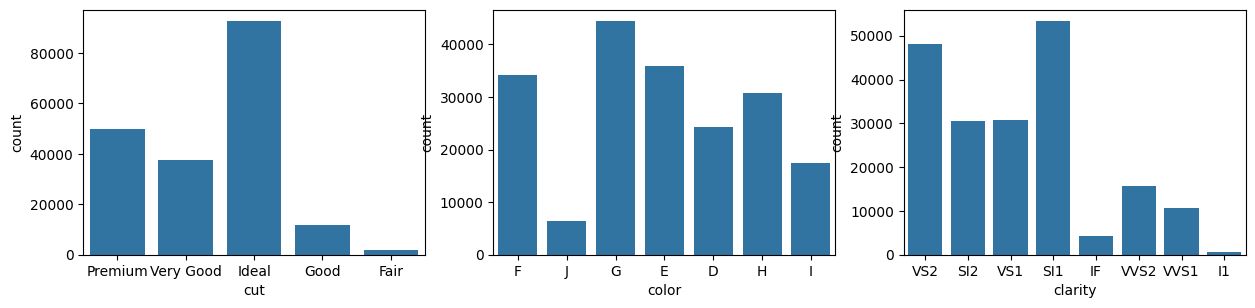

In [29]:
figure = plt.figure(figsize=(15,7))
for i,col in enumerate(categorical_columns,1):
    if i>len(categorical_columns):
        break
    plt.subplot(2,3,i)
    sns.countplot(data=df,x=col)
    
plt.show() 

<Axes: >

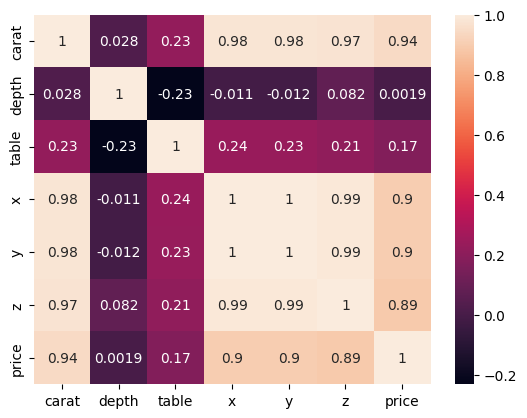

In [35]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [37]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [38]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [40]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [41]:
cut_map = {'Ideal':1,'Premium':2, 'Very Good':3, 'Good':4, 'Fair':5}
color_map = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
clarity_map = {'IF':8, 'VVS1':7, 'VVS2':6, 'VS1':5, 'VS2':4, 'SI1':3, 'SI2':2, 'I1':1}

In [1]:
Cutcategories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
Colorcategories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
Claritycategories = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [42]:
df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)

In [44]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,2,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,1,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,1,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,2,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [ ]:
cut_map = ['Ideal','Premium', 'Very Good', 'Good', 'Fair']